In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

In [2]:
Scaler = StandardScaler()
sns.set ()

In [10]:
raw_data = pd.read_csv('Data for Clustering - Count.txt')
raw_data.drop('Partido', axis = 1, inplace=True)
raw_data

,abandono escolar,acesso,administração,administração pública,ambiente,apenas,apoio,assegurar,assim,através,...,tem,todo,trabalhador,trabalhar,valor,vida,área,é,é essencial,é necessário
0,4.0,101.0,32.0,14.0,26.0,60.0,111.0,13.0,51.0,68.0,...,152.0,160.0,108.0,155.0,103.0,45.0,90.0,338.0,2.0,17.0
1,0.0,5.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,5.0,...,1.0,6.0,2.0,3.0,2.0,7.0,5.0,13.0,0.0,0.0
2,54.0,326.0,225.0,113.0,64.0,185.0,166.0,185.0,201.0,188.0,...,503.0,407.0,158.0,205.0,169.0,119.0,197.0,1161.0,57.0,74.0
3,0.0,70.0,22.0,16.0,31.0,20.0,66.0,27.0,26.0,118.0,...,37.0,156.0,41.0,96.0,33.0,43.0,44.0,81.0,3.0,12.0
4,2.0,65.0,49.0,32.0,52.0,19.0,90.0,24.0,23.0,103.0,...,113.0,97.0,22.0,58.0,46.0,59.0,68.0,283.0,5.0,15.0
5,1.0,103.0,87.0,62.0,23.0,18.0,180.0,60.0,76.0,157.0,...,37.0,159.0,57.0,112.0,46.0,60.0,108.0,136.0,11.0,8.0
6,1.0,69.0,65.0,42.0,133.0,27.0,119.0,40.0,41.0,122.0,...,181.0,149.0,23.0,73.0,76.0,80.0,119.0,394.0,6.0,28.0


In [5]:
DataMDS = pd.read_csv('MDS Data.txt')
DataMDS.drop('Unnamed: 0', axis = 1, inplace=True)
DataMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3,4Dimension1,4Dimension2,4Dimension3,4Dimension4
0,BE,0.047981,-0.056858,-0.046517,-5268.412264,962.086841,5013.552116,-0.037569,-0.013999,0.091271,-0.012367
1,CH,-0.455939,0.407483,0.151521,36383.169878,-28293.520684,7923.123992,0.294895,-0.039591,-0.048838,0.296861
2,IL,0.630771,-0.609872,0.126818,-64653.503321,5821.931700,-17145.227765,-0.376095,0.445227,-0.007641,-0.199679
3,Livre,-0.200697,0.174545,-0.186021,14377.381112,7497.712654,20138.628062,0.164415,-0.131836,0.072351,-0.103841
4,PCP,-0.025237,0.074650,0.030731,9931.024179,-1038.820842,-6042.725569,0.001432,-0.115674,-0.002166,0.057571
5,PS,-0.072914,0.024616,-0.122684,8863.155540,13323.904833,-1600.324590,0.030549,-0.080797,-0.080167,-0.058386
6,PSD,0.076034,-0.014564,0.046151,367.184877,1726.705498,-8287.026245,-0.077628,-0.063329,-0.024811,0.019841


In [6]:
OutputLinearRegression = pd.DataFrame(columns = DataMDS.columns)
OutputLinearRegression.drop('Partido', axis = 1, inplace=True)
OutputLinearRegression['Words'] = raw_data.columns
OutputLinearRegression

,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3,4Dimension1,4Dimension2,4Dimension3,4Dimension4,Words
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abandono escolar
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acesso
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,administração
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,administração pública
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ambiente
...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vida
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,área
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,é
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,é essencial


In [8]:
x = raw_data

for i in range(10):
    y = DataMDS[DataMDS.columns[i+1]]
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x,y)
    OutputLinearRegression[DataMDS.columns[i+1]] = reg.coef_
    

In [9]:
for i in range(10):
    print([DataMDS.columns[i+1]])
    ToPrint = OutputLinearRegression[['Words', DataMDS.columns[i+1]]].sort_values(by=DataMDS.columns[i+1],ascending=True)
    ToPrint = ToPrint.sort_values(by=DataMDS.columns[i+1],ascending=True)
    print(ToPrint)
    #print(OutputLinearRegression[['Words', DataMDS.columns[i+1]]])
    print("\n")


['1Dimension1']
          Words  1Dimension1
33      direita    -0.002671
124      social    -0.001609
19       contra    -0.001530
125  socialismo    -0.001278
89    português    -0.001163
..          ...          ...
4      ambiente     0.000682
94     programa     0.000686
135           é     0.000734
128         tem     0.000752
21        criar     0.000815

[138 rows x 2 columns]


['2Dimension1']
          Words  2Dimension1
21        criar    -0.000718
94     programa    -0.000651
128         tem    -0.000648
135           é    -0.000614
4      ambiente    -0.000572
..          ...          ...
89    português     0.001065
125  socialismo     0.001130
19       contra     0.001351
124      social     0.001451
33      direita     0.002362

[138 rows x 2 columns]


['2Dimension2']
               Words  2Dimension2
96          proposta    -0.000300
21             criar    -0.000280
30   desenvolvimento    -0.000273
75              novo    -0.000231
34           direito    -0.000228


In [2]:
data = pd.read_csv('1.02.+Multiple+linear+regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [3]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [5]:
x = data[['SAT', "Rand 1,2,3"]]
y = data['GPA']
print(x.shape, y.shape)

(84, 2) (84,)


In [6]:
reg = LinearRegression()

In [7]:
reg.fit(x,y)

LinearRegression()

In [12]:
print(reg.score(x,y), reg.coef_, reg.intercept_)

0.40668119528142843 [ 0.00165354 -0.00826982] 0.29603261264909486


In [22]:
RAdj2 = 1 - (1-reg.score(x,y)) * (x.shape[0]-1) /(x.shape[0]-x.shape[1]-1)
print(RAdj2)

0.39203134825134023


In [25]:
f_regression(x,y)[1]

array([7.19951844e-11, 6.76291372e-01])

In [54]:
test = pd.DataFrame(data=[1700])
##test.values.reshape(-1,1)
reg.predict(test)

array([3.08970998])

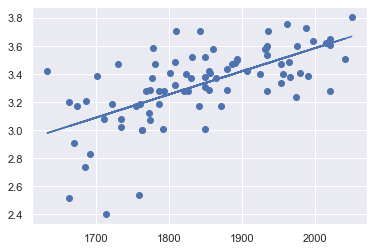

In [62]:
plt.scatter(x,y)
yhat = reg.coef_[0]*x + reg.intercept_
fig = plt.plot(x,yhat)
plt.show()

In [26]:
reg.intercept_

0.29603261264909486

In [33]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Variables'])
reg_summary['Coeficientes'] = reg.coef_
reg_summary['p-values'] = f_regression(x,y)[1]
reg_summary

,Variables,Coeficientes,p-values
0,SAT,0.001654,7.199518e-11
1,"Rand 1,2,3",-0.008270,6.762914e-01


In [47]:
Scaler.fit(x)
x_scaled = Scaler.transform(x)

In [50]:
reg1 = LinearRegression()
reg1.fit(x_scaled,y)

LinearRegression()

In [55]:
print (reg1.intercept_, reg1.coef_)

3.330238095238095 [ 0.17181389 -0.00703007]


In [68]:
reg1_summary = pd.DataFrame(['intercept','SAT','Rand 1,2,3'], columns=['Variables'])
reg1_summary['Coeficientes'] = reg1.intercept_, reg1.coef_[0], reg1.coef_[1]
reg1_summary

,Variables,Coeficientes
0,intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [71]:
new_data1 = pd.DataFrame(data=[[1700,0],[1710,1]],columns=['SAT',"Rand 1,2,3"])
new_data1

,SAT,"Rand 1,2,3"
0,1700,0
1,1710,1


In [74]:
new_data1_scaled = Scaler.transform(new_data1)
reg1.predict(new_data1_scaled)

array([3.10705367, 3.11531927])